In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=2)
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Models
from catboost import CatBoostClassifier
# Reason behind using CatBoost is explained later in the notebook

In [8]:
train = pd.read_csv('./Documents/comp2_train.csv')
test = pd.read_csv('./Documents/comp2_test.csv')

In [9]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [10]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [11]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [12]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [15]:
print(train.shape)

(8693, 14)


In [16]:
print(test.shape)

(4277, 13)


In [17]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [18]:
#to make passanger as a not considered value because it is a unique value for every passanger
train.set_index('PassengerId',inplace=True)
test.set_index('PassengerId',inplace=True)


In [19]:
train.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

In [20]:
test.isnull().sum().sort_values(ascending=False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
dtype: int64

In [21]:
train.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [22]:
train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] =train[['RoomService','FoodCourt',
                                                                         'ShoppingMall','Spa','VRDeck']].fillna(0)
test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] =test[['RoomService','FoodCourt',
                                                                       'ShoppingMall','Spa','VRDeck']].fillna(0)
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())  

In [23]:
train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [24]:
train['VIP'] =train['VIP'].fillna(False)
test['VIP'] =test['VIP'].fillna(False)

In [25]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [26]:
#fill null values as well.
train['HomePlanet'] =train['HomePlanet'].fillna('Mars')
test['HomePlanet'] =test['HomePlanet'].fillna('Mars')

In [27]:
train['Destination']=train['Destination'].fillna("PSO J318.5-22")
test['Destination']=test['Destination'].fillna("PSO J318.5-22")

train['CryoSleep'] =train['CryoSleep'].fillna(False)
test['CryoSleep'] =test['CryoSleep'].fillna(False)

train['Cabin'] =train['Cabin'].fillna('T/0/P')
test['Cabin'] =test['Cabin'].fillna('T/0/P')

In [28]:
train.isnull().sum().sort_values(ascending=False)

Name            200
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Cabin         8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   bool   
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(4)
memory usage: 772.5+ KB


In [30]:
train.corr()['Transported'].sort_values(ascending=False)[1:]

CryoSleep       0.460132
FoodCourt       0.045583
ShoppingMall    0.009391
VIP            -0.037261
Age            -0.074233
VRDeck         -0.204874
Spa            -0.218545
RoomService    -0.241124
Name: Transported, dtype: float64

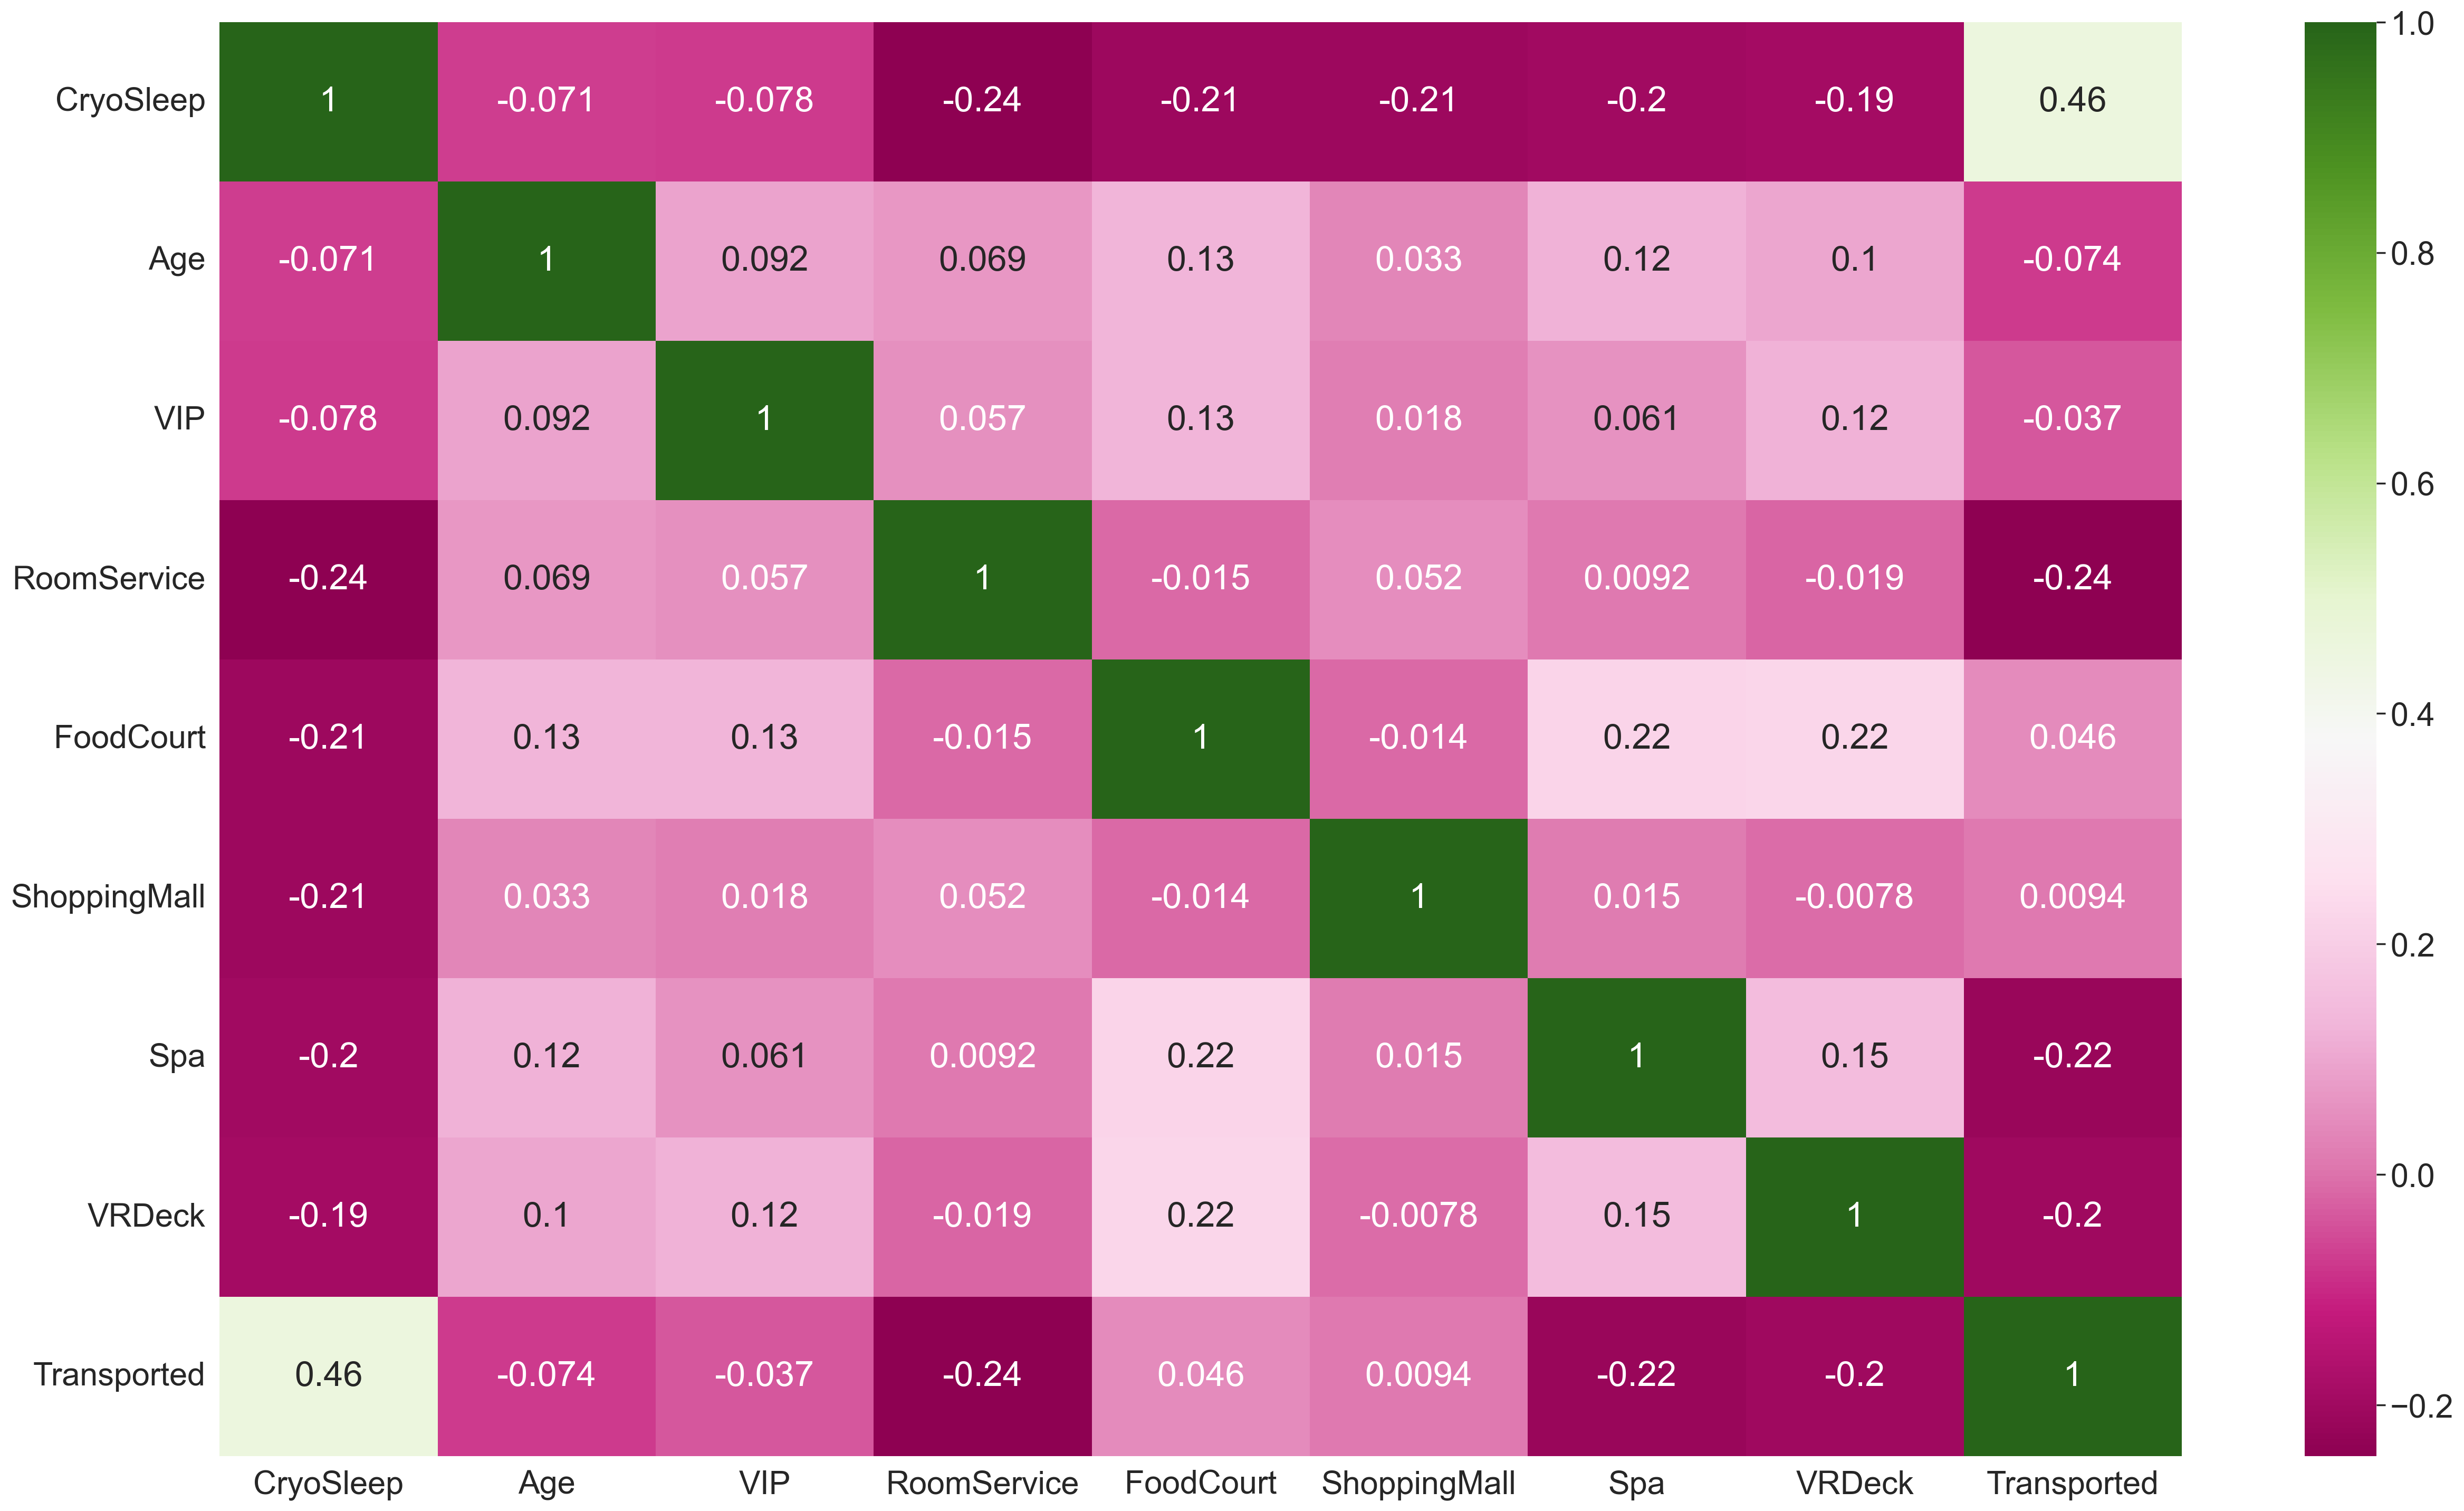

In [31]:
plt.figure(figsize=(30,18),dpi=200)
sns.heatmap(train.corr(), annot=True,cmap="PiYG"  );

<AxesSubplot:xlabel='Transported', ylabel='count'>

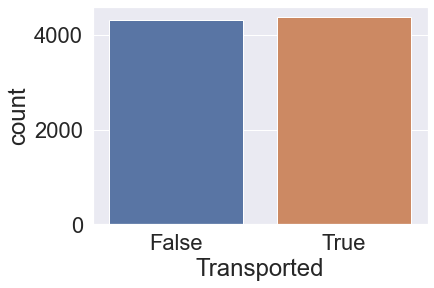

In [32]:
sns.countplot(x=train['Transported'])

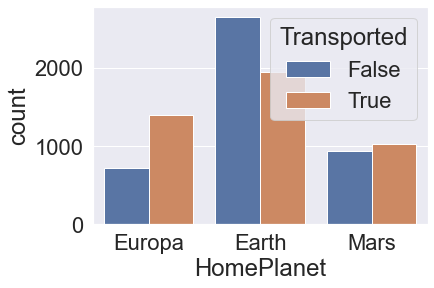

In [33]:
sns.countplot(data=train,x='HomePlanet',hue='Transported');

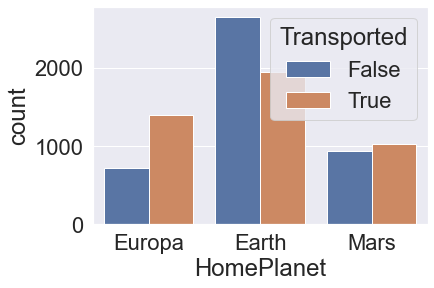

In [34]:
sns.countplot(data=train,x='HomePlanet',hue='Transported');

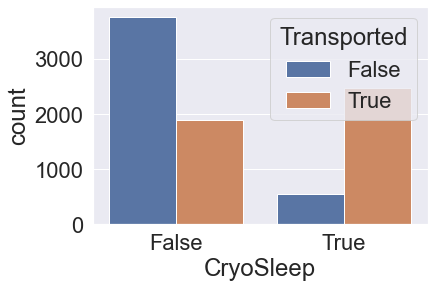

In [35]:
sns.countplot(train.CryoSleep,hue=train.Transported);

<AxesSubplot:xlabel='Destination', ylabel='count'>

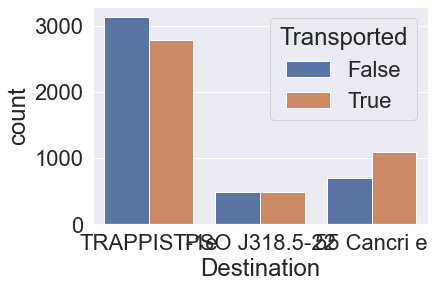

In [36]:
sns.countplot(data=train, x='Destination',hue='Transported')

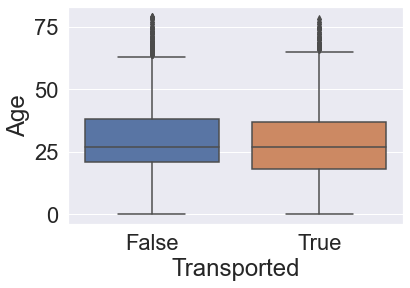

In [37]:
sns.boxplot(data=train,x='Transported', y = 'Age');

In [38]:
train[['Deck','Num','Side']] = train.Cabin.str.split('/',expand=True) 
test[['Deck','Num','Side']] = test.Cabin.str.split('/',expand=True)

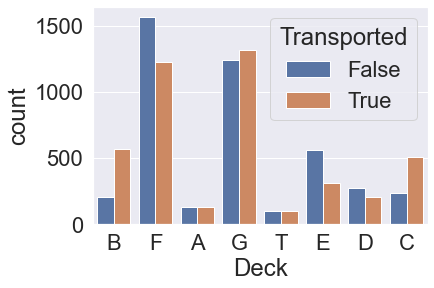

In [39]:
sns.countplot(train.Deck,hue=train.Transported);

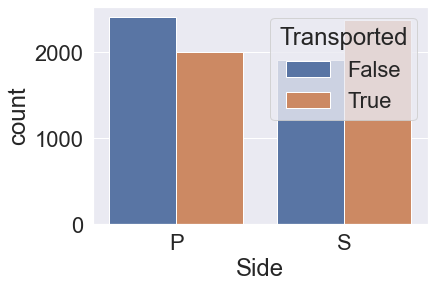

In [40]:
sns.countplot(train.Side,hue=train.Transported);

In [41]:
train.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'Deck', 'Num', 'Side'],
      dtype='object')

In [42]:
train['Total Spent'] =train['RoomService']+train['FoodCourt']+ train['ShoppingMall']+ train['Spa']+ train['VRDeck']
test['Total Spent'] = test['RoomService']+test['FoodCourt']+ test['ShoppingMall']+ test['Spa']+ test['VRDeck']

In [43]:
train['AgeGroup']  = 0
for i in range(6):
    train.loc[(train.Age >= 10*i) & (train.Age < 10*(i+1)),'AgeGroup'] = i
    
test['AgeGroup']  = 0
for i in range(6):
    test.loc[(test.Age >= 10*i) & (test.Age < 10*(i+1)),'AgeGroup'] = i

In [44]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Total Spent,AgeGroup
PassengerId,,,,,,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0.0,3
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,736.0,2
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,10383.0,5
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,5176.0,3
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,1091.0,1


In [45]:
from sklearn.preprocessing import LabelEncoder
categorical_cols= ['HomePlanet','CryoSleep','Destination','VIP','Deck','Side','Num']
for i in categorical_cols:
    le=LabelEncoder()
    arr=np.concatenate((train[i], test[i])).astype(str)
    le.fit(arr)
    train[i]=le.transform(train[i].astype(str))
    test[i]=le.transform(test[i].astype(str))

In [46]:
train=train.drop(['Name','Cabin'],axis=1)
test= test.drop(['Name','Cabin'],axis=1)

In [47]:
train['Transported']=train['Transported'].replace({True:1,False:0})

In [48]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Total Spent,AgeGroup
PassengerId,,,,,,,,,,,,,,,,
0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0.0,3
0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,0,1,736.0,2
0003_01,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,1,10383.0,5
0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1,5176.0,3
0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1,1,1091.0,1


In [49]:
X = train.drop('Transported',axis = 1)
y = train['Transported']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.3, random_state=101)

In [51]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=1500,eval_metric='Accuracy',verbose = 0)

In [52]:
model.fit(X_train,y_train)

In [66]:
pred_y=model.predict(X_val)

pred=model.predict(X_train)
    
print(accuracy_score(y_train.values,pred))
print(accuracy_score(y_val.values,pred_y))

0.8815119145439606
0.8186349693251533


In [67]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(CatBoostClassifier(),param_grid={'iterations': range(2,20,2), 'eval_metric': ['Accuracy'],
                                                   'verbose':[0]},cv=3)

grid.fit(X_train,y_train)
pred_y=grid.predict(X_val)

pred=grid.predict(X_train)
    
print(accuracy_score(y_train.values,pred))
print(accuracy_score(y_val.values,pred_y))

0.8110106820049302
0.8075153374233128


In [68]:
y_pred = grid.predict(test)

sub = pd.DataFrame({'Transported':y_pred.astype(bool)}, index = test.index)

sub.head()

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,False


In [72]:
sub.to_csv('submission.csv')

In [80]:
sub.to_csv("C:\\Users\\saich\\OneDrive\\Desktop\\df.csv")